# CS530 Homework 6 Solution

In [2]:
import numpy as np
import pandas as pd

#### Question 1. (4 points)

a. Files 'train.csv' and 'test.csv' contain data for the Heart Disease dataset. Use the scikit-learn package to train a logistic regression model on the training set, train.csv, and predict on the test set, test.csv. The variable that you are predicting is named 'target'. Give an accuracy of your prediction on the test set. You can find the description of the data in 'heart-disease.names' file.


In [3]:
# Your code goes here.
train = pd.read_csv('data/train.csv', index_col=None)
train.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,0,0,108,269,0,1,169,1,1.8,1,2,2,0
1,1,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1
2,2,65,1,0,110,248,0,0,158,0,0.6,2,2,1,0
3,3,55,1,1,130,262,0,1,155,0,0.0,2,0,2,1
4,4,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


In [4]:
test = pd.read_csv('data/test.csv', index_col=None)
test.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,227,49,1,2,118,149,0,0,126,0,0.8,2,3,2,0
1,228,51,0,0,130,305,0,1,142,1,1.2,1,0,3,0
2,229,42,0,2,120,209,0,1,173,0,0.0,1,0,2,1
3,230,61,0,0,130,330,0,0,169,0,0.0,2,0,2,0
4,231,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


In [5]:
sc_features = ['age', 'trestbps', 'chol', 'thalach']
other_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

In [6]:
X_train_sc_features = train[sc_features].values
X_train_others = train[other_features].values
X_test_sc_features = test[sc_features].values
X_test_others = test[other_features].values

y_train = train['target'].values
y_test = test['target'].values

In [7]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train_sc_features)
X_train_sc = scaler.transform(X_train_sc_features)
X_test_sc = scaler.transform(X_test_sc_features)

X_train = np.hstack([X_train_sc, X_train_others])
X_test = np.hstack([X_test_sc, X_test_others])


In [10]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='lbfgs', max_iter=1000)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

In [11]:
# Calculate accuracy
np.sum(y_pred==y_test)/len(y_pred)

0.8552631578947368

b. Use the scikit-learn package to plot an ROC curve of the predictions on the test set from 1a.

In [12]:
from sklearn import metrics
import matplotlib.pyplot as plt

In [13]:
y_pred_proba = LR.predict_proba(X_test)

FPR : [0.         0.         0.         0.03571429 0.03571429 0.07142857
 0.07142857 0.10714286 0.10714286 0.14285714 0.14285714 0.17857143
 0.17857143 0.25       0.25       0.28571429 0.28571429 0.53571429
 0.53571429 1.        ] 
TPR : [0.         0.02083333 0.39583333 0.39583333 0.5        0.5
 0.6875     0.6875     0.70833333 0.70833333 0.89583333 0.89583333
 0.91666667 0.91666667 0.95833333 0.95833333 0.97916667 0.97916667
 1.         1.        ] 
Thr : [1.99318173 0.99318173 0.90622571 0.88319871 0.83814435 0.82810568
 0.63626186 0.63461392 0.63393296 0.62992788 0.47127834 0.44060931
 0.43015351 0.40917388 0.38911477 0.37710746 0.29855854 0.0838594
 0.06585736 0.00246386]


Text(0, 0.5, 'Sklearn ROC')

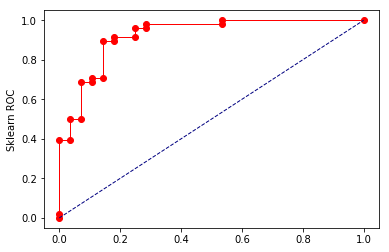

In [14]:
# Your code goes here.
fpr, tpr, thr = metrics.roc_curve(y_test, y_pred_proba[:,1])
print("FPR : {} \nTPR : {} \nThr : {}".format(fpr, tpr, thr))
plt.plot(fpr, tpr, 'ro-', lw=1)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.ylabel('Sklearn ROC')

c. Implement a function to plot the ROC curve of the model you get from on the test set. (Hints: 1. check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) of logistic regression to get the probability output. 2. Loop through a list of probability thresholds for classification and calculate the Specificity and Sensitivity for each threshold value.)

Text(0, 0.5, 'ROC')

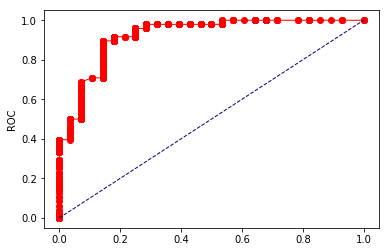

In [15]:
thresholds = np.linspace(0,1,1000)

def roc_curve(predict_probabilities, thresholds):
    fprs = []
    tprs = []
    for threshold in thresholds:
        y_pred = predict_probabilities[:,1] > threshold
        tpr = np.sum(y_pred & y_test)/np.sum(y_test==1)
        fpr = 1 - np.sum((~y_pred) & (~y_test))/np.sum(y_test==0)
        fprs.append(fpr)
        tprs.append(tpr)

    return fprs, tprs

fprs, tprs = roc_curve(y_pred_proba, thresholds)

plt.plot(fprs, tprs, 'ro-', lw=1)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.ylabel('ROC')
        

#### Question 2 (3 points)

a. Use the same dataset in Question 1 to train a classification model with the LDA algorithm. Give a prediction accuracy on the test set.

In [16]:
# Your code goes here
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [17]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)
y_pred = LDA.predict(X_test)
np.sum(y_pred==y_test)/len(y_pred)

0.8552631578947368

b. Plot the ROC curve of the LDA model you trained in 2a on the test set. You can use the scikit-learn package.

FPR : [0.         0.         0.         0.03571429 0.03571429 0.07142857
 0.07142857 0.10714286 0.10714286 0.14285714 0.14285714 0.21428571
 0.21428571 0.25       0.25       0.28571429 0.28571429 0.53571429
 0.53571429 1.        ] 
TPR : [0.         0.02083333 0.375      0.375      0.47916667 0.47916667
 0.66666667 0.66666667 0.72916667 0.72916667 0.89583333 0.89583333
 0.91666667 0.91666667 0.9375     0.9375     0.97916667 0.97916667
 1.         1.        ] 
Thr : [1.99723314e+00 9.97233138e-01 9.52384904e-01 9.41079997e-01
 8.76837969e-01 8.72726359e-01 7.12816297e-01 6.94235922e-01
 6.81436043e-01 6.76315226e-01 4.84841422e-01 4.50106352e-01
 4.15171350e-01 3.92640058e-01 3.81089875e-01 3.62437401e-01
 2.77495781e-01 7.42186081e-02 7.12972894e-02 1.71170222e-03]


Text(0, 0.5, 'Sklearn ROC')

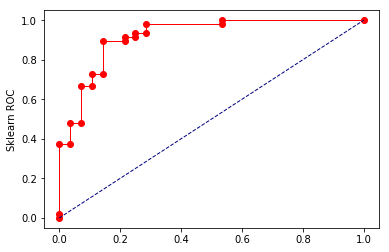

In [18]:
# Your code goes here
y_pred_proba = LDA.predict_proba(X_test)
fpr, tpr, thr = metrics.roc_curve(y_test, y_pred_proba[:,1])
print("FPR : {} \nTPR : {} \nThr : {}".format(fpr, tpr, thr))
plt.plot(fpr, tpr, 'ro-', lw=1)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.ylabel('Sklearn ROC')

c. Compare the ROC and accuracy on the test set that you get from Questions 1 and 2. Which algorithm performs better on this dataset? Explain your answer and hypothesize why one algorithm might be better than the other on this dataset.

In [19]:
# Your code goes here

The two algorithm gives the same result for the ROC curve. On this particular dataset, logistic regression and LDA dose not
Make a big difference. The dataset might be roughly linearly seperable. The assumption under LDA is that the 
two classes are from two normal distributions with same variances. Logistic regression try to fit a logistic function to the two classes, which also does well on linearly seperable data. The two algorithms seems both doing quite well on the dataset and they are giving the same ROC curve.

#### Question 3 (3 points)

a. Use the synthetic dataset (created below) to train a logistic regression model on the training set. Calculate the AUC of your prediction on the test set.

In [20]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

X, y = datasets.make_classification(n_samples=2000, n_features=20,
                                    n_informative=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
# Your code goes here
from sklearn import metrics

def cal_auc(y_test, y_pred):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred[:,1], pos_label=1)
    return metrics.auc(fpr, tpr)

In [22]:
LR = LogisticRegression(solver='lbfgs', max_iter=1000)
LR.fit(X_train, y_train)
y_pred = LR.predict_proba(X_test)

auc_all = cal_auc(y_test, y_pred)

In [23]:
auc_all

0.8389665871780944

b. Randomly sample 100, 300, and 1000 data points from the training set. For each sample size, randomly sample 1000 times, each time fit a logistic regresson, predict on the test set and calcuate the AUC. Plot a distribution of the 1000 AUCs for each sample size on the same plot. Also, plot the AUC you get from 3a as a verticle line on the same plot as well. (Hints: Plot [distributions/histogram](https://stackoverflow.com/questions/6871201/plot-two-histograms-on-single-chart-with-matplotlib).) 

In [24]:
# Your code goes here
LR = LogisticRegression(solver='lbfgs')

n = len(y_train)

def sampling(n_samples, n_iter):
    aucs=[]
    for i in range(n_iter):
        indexes = np.random.choice(n, n_samples, replace=False)
        X_tmp = X_train[indexes]
        y_tmp = y_train[indexes]
        y_pred = LR.fit(X_tmp, y_tmp).predict_proba(X_test)
        aucs.append(cal_auc(y_test, y_pred))
    return aucs

aucs_100 = sampling(100,1000)
aucs_300 = sampling(300,1000)
aucs_1000 = sampling(1000,1000)

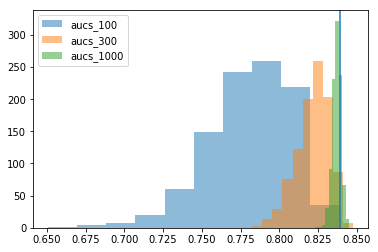

In [25]:
plt.hist(aucs_100, alpha=0.5, label='aucs_100')
plt.hist(aucs_300, alpha=0.5, label='aucs_300')
plt.hist(aucs_1000, alpha=0.5, label='aucs_1000')
plt.axvline(x=auc_all, ymin=0, ymax=300)
plt.legend(loc='upper left')
plt.show()

c. What pattern did you see from the plot you get from 3b? Explain your findings.

The more sample we draw, the better the AUC is. Also the precision of the AUC is also increasing as the sample size increases from 100 to 1000. When we have 1000 samples, we are getting very close AUC to the result when we have the entire training set. This indicates the importance of the amount of dataset to the accuracy of a model. The more data we have, the more confidence that we are getting the AUC close to that from the real model.